___

$
\text{MAPE} = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right| \times 100
$

In [1]:
def Mape(predict, observed):
  absolute_diff_percentage =  abs( (predict - observed) / observed)
  sum_abs_diff = sum(absolute_diff_percentage)
  mape = (sum_abs_diff / len(predict))*100 #パーセント表記
  print(f'MAPE : {mape:.1f} %')
  #mape は GroudTruth を基準にしたときの予測値のずれの比率について，全データを計算したときの，データ1つあたりの平均


$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

In [2]:
def Mse(predict, observed):
    squared_diff = (predict - observed) ** 2
    mean_squared_error = sum(squared_diff) / len(predict)  # 平均を計算
    print(f'MSE : {mean_squared_error:.4f}')  # 小数点以下4桁で表示
    # mean_squared_error は予測値と実際の値の誤差の二乗の平均

---

# LSTM

In [3]:
import pickle
import os

# 読み込み用のパス
pickle_path = ('/home/shin/lab/00_project/LSTM_kochi(tmp)/pickles/20240924-055219/vars_exoFalse.pickle')

# pickleでデータを読み込む
with open(pickle_path, mode='rb') as fi:
    data = pickle.load(fi)

# date
# loaded_true_train_start_date = data['train_start_date']
# loaded_true_train_end_date = data['train_end_date']
# loaded_true_test_start_date = data['test_start_date']
# loaded_true_test_end_date = data['test_end_date']

# # test set
loaded_date_rng = data['date_rng']
loaded_df_test_inversed_plt = data['df_test_inversed_plt']
# predicted set
loaded_forecasted_date_rng = data['predicted_date_rng']
loaded_forecasted_test_plot_inversed_plt = data['predicted_test_plot_inversed_plt']
# all data
# loaded_df_ex = data['df_ex']


# データ加工
import pandas as pd
df_LSTM_test=pd.DataFrame({'pop':loaded_df_test_inversed_plt},index=loaded_date_rng)
df_LSTM_forecasted=pd.DataFrame({'pop':loaded_forecasted_test_plot_inversed_plt},index=loaded_forecasted_date_rng)

In [4]:
lstm_mape=Mape(df_LSTM_forecasted['pop'],df_LSTM_test.iloc[-len(df_LSTM_forecasted['pop']):,0])
lstm_mse=Mse(df_LSTM_forecasted['pop'],df_LSTM_test.iloc[-len(df_LSTM_forecasted['pop']):,0])

MAPE : 16.4 %
MSE : 7772.5414


## graph

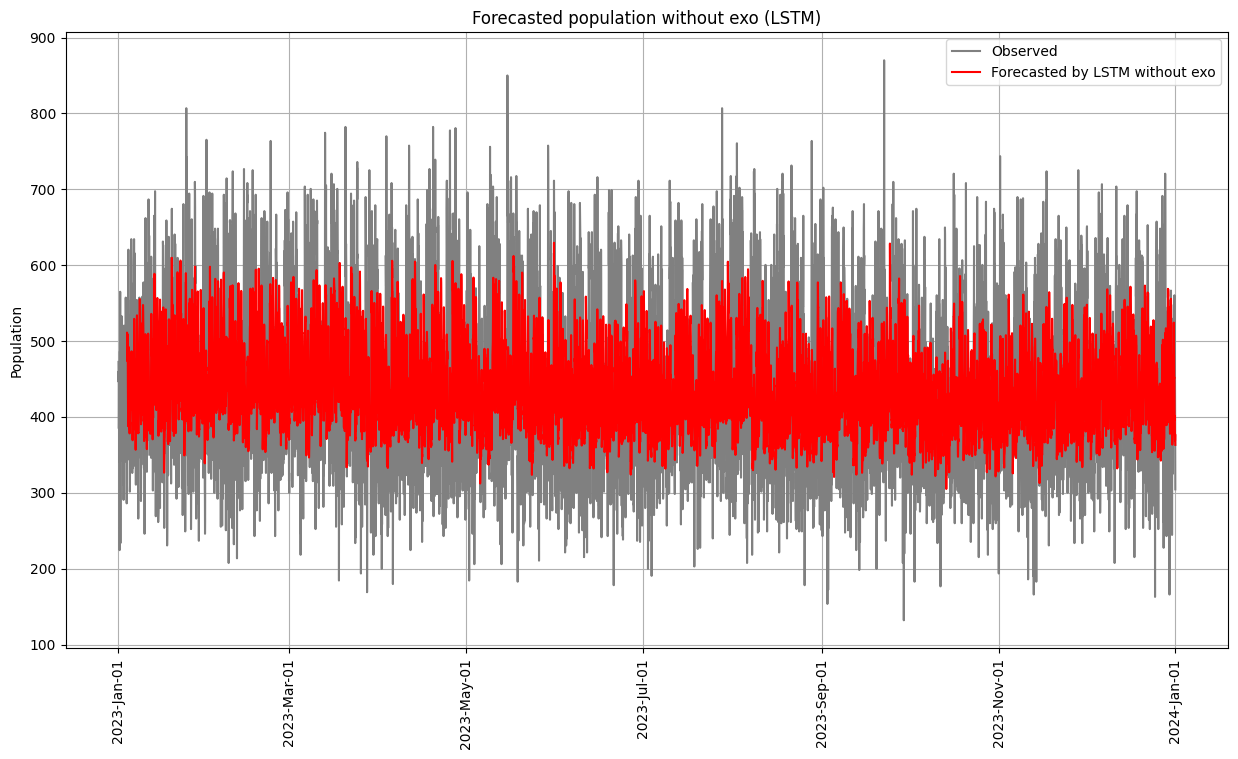

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# プロット
fig, ax = plt.subplots(figsize=(15,8))  # サイズを指定する

# データのプロット
ax.plot(df_LSTM_test, label='Observed', linewidth=1.5, color='gray')
ax.plot(df_LSTM_forecasted, label='Forecasted by LSTM without exo', linewidth=1.5, color='red')

ax.legend()
ax.grid()

formatter = mdates.DateFormatter('%Y-%b-%d')  # 年-月-日形式で表示
ax.xaxis.set_major_formatter(formatter)
# x軸のラベルを90度回転させる
ax.tick_params(axis='x', rotation=90)

plt.title('Forecasted population without exo (LSTM)')
plt.ylabel('Population')

plt.show()

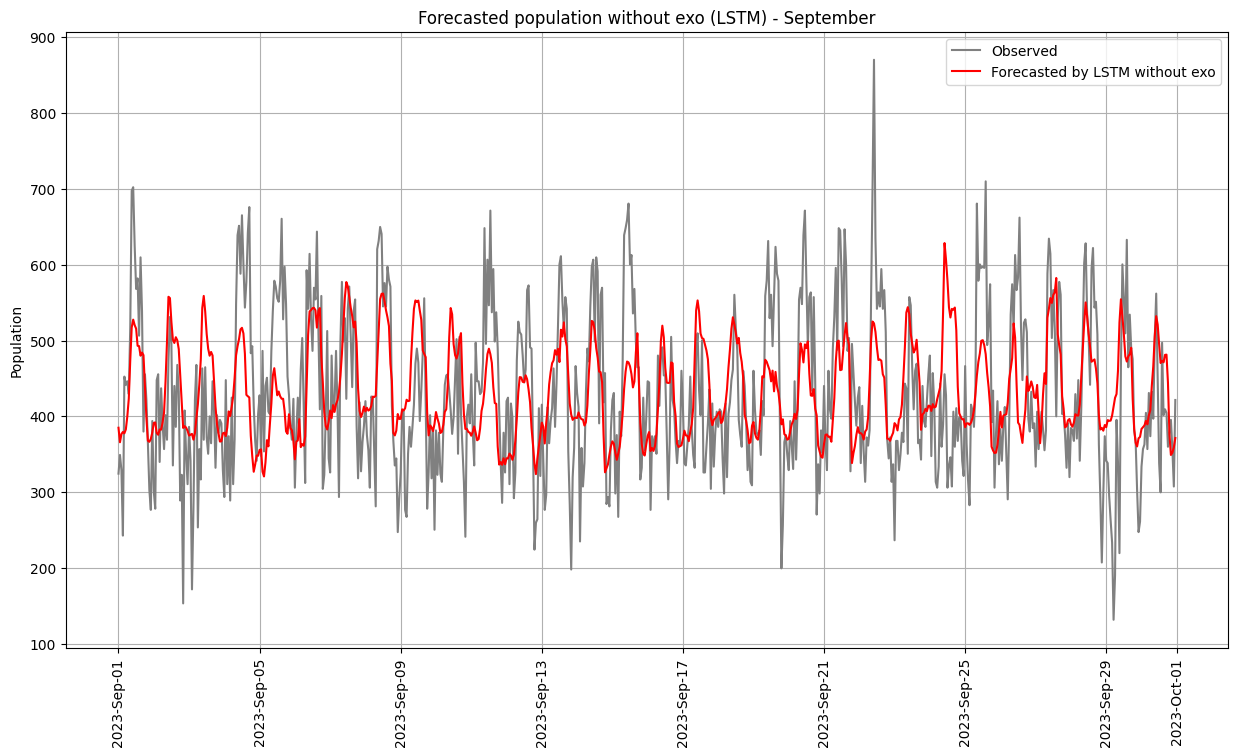

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 9月のデータをフィルタリング
df_LSTM_test_september = df_LSTM_test[(df_LSTM_test.index.month == 9)]
df_LSTM_forecasted_september = df_LSTM_forecasted[(df_LSTM_forecasted.index.month == 9)]

# プロット
fig, ax = plt.subplots(figsize=(15, 8))  # サイズを指定する

# データのプロット
ax.plot(df_LSTM_test_september, label='Observed', linewidth=1.5, color='gray')
ax.plot(df_LSTM_forecasted_september, label='Forecasted by LSTM without exo', linewidth=1.5, color='red')

ax.legend()
ax.grid()

formatter = mdates.DateFormatter('%Y-%b-%d')  # 年-月-日形式で表示
ax.xaxis.set_major_formatter(formatter)
# x軸のラベルを90度回転させる
ax.tick_params(axis='x', rotation=90)

plt.title('Forecasted population without exo (LSTM) - September')
plt.ylabel('Population')

plt.show()

csv

In [2]:
import pandas as pd

path1 = '/home/shin/lab/00_project/LSTM_kochi(tmp)/pickles/20240925-191719_06/output_data.csv'
df06 = pd.read_csv(path1, encoding='utf-8')

path2 = '/home/shin/lab/00_project/LSTM_kochi(tmp)/pickles/20240925-192542_24/output_data.csv'
df24 = pd.read_csv(path2, encoding='utf-8')

path3 = '/home/shin/lab/00_project/LSTM_kochi(tmp)/pickles/20240925-190806_48/output_data.csv'
df48 = pd.read_csv(path3, encoding='utf-8')

# 列名を変更する
df_observed = df06[['df_test_inversed_plt']].rename(columns={'df_test_inversed_plt': 'observed'})
df06_renamed = df06[['predicted_test_plot_inversed_plt']].rename(columns={'predicted_test_plot_inversed_plt': 'predicted_06h'})
df24_renamed = df24[['predicted_test_plot_inversed_plt']].rename(columns={'predicted_test_plot_inversed_plt': 'predicted_24h'})
df48_renamed = df48[['predicted_test_plot_inversed_plt']].rename(columns={'predicted_test_plot_inversed_plt': 'predicted_48h'})

# df06はそのまま使用
df_connected = pd.concat([df06['datetime'],df_observed, df06_renamed, df24_renamed, df48_renamed], axis=1)

# 結果をCSVファイルに保存
df_connected.to_csv('lstm_all.csv', encoding='utf-8', index=False)